# &#x1F4DC; Lecture 2

Let us now understand the **input/output** relationship at the **discrete-time baseband complex domain**.

Recall: "meet me at 4pm"

$
\begin{align}
{\color{cyan}\text{we want this}} \\
{\color{orange}h_b(t,\tau)} \\
\end{align}
$

$$
\underbrace{
\{ x_1, x_2, \dots, x_n \}
}_{\text{discrete complex}}
{\color{cyan}
\xrightarrow{\quad } 
\boxed{ sinc(W_t - n) } \xrightarrow{\quad } 
x_b(t) \xrightarrow{\quad } 
}
{\color{orange}
\underset{\hat{
\begin{matrix}
  & | \\
  \cos \\
  \approx
\end{matrix} 2\pi f_c t}
}{\bigotimes}
\xrightarrow{\quad x(t) \quad }  \boxed{\qquad h(t, \tau) \qquad } \xrightarrow{ \quad y(t) \quad } 
\underset{\hat{
\begin{matrix}
  & | \\
  \cos \\
  \approx
\end{matrix} 2\pi f_c t}
}{\bigotimes}
}
{\color{cyan}
\xrightarrow{\quad y_b(t) \quad}
\overset{\overset{\text{sample}}{f_s = \frac{1}{w}}}{\overrightarrow{/}}
\xrightarrow{\quad}
}
\underbrace{
\{ y_1, y_2, \dots, y_n \}
}_{\text{discrete complex}}
$$


- to get sequence
$
\{ g(n \tau_s) \}
$

- to get
$
g_{\delta}(t) = \sum\limits_{n=-\infty}^{\infty} g(n\tau_s) \cdot \delta(t - n\tau_s)
$

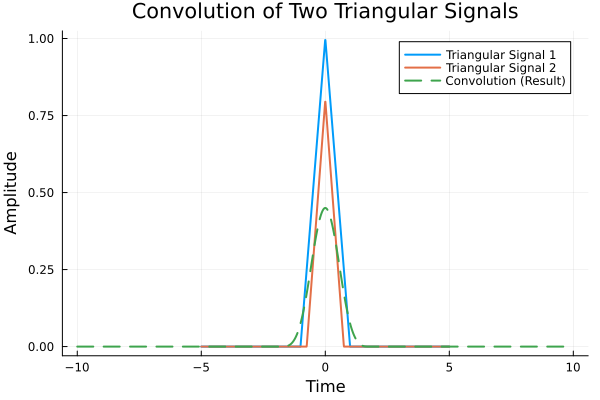

In [6]:
# Import the necessary library
using Plots
using DSP

# Define the triangular function
function triangular(t, A, τ)
    return A * max(1 - abs(t) / (τ / 2), 0.0)
end

# Parameters for the triangular signals
A1 = 1.0       # Amplitude of the first triangle
τ1 = 2.0       # Width of the first triangle
A2 = 0.8       # Amplitude of the second triangle
τ2 = 1.5       # Width of the second triangle

# Define the time range
t = range(-5, stop=5, length=1000)  # Time axis for plotting

# Create the two triangular signals
tri1 = [triangular(ti, A1, τ1) for ti in t]
tri2 = [triangular(ti, A2, τ2) for ti in t]

# Perform the convolution
Δt = t[2] - t[1]  # Sampling interval
convolution = conv(tri1, tri2) * Δt  # Adjust for the sampling interval

# Adjust the time range for the convolution
t_conv = range(2 * first(t), stop=2 * last(t), length=length(convolution))

# Plot the original signals
plot(t, tri1, label="Triangular Signal 1", lw=2)
plot!(t, tri2, label="Triangular Signal 2", lw=2)

# Plot the convolution result
plot!(t_conv, convolution
    , label="Convolution (Result)", linestyle=:dash, lw=2
    , xlabel = "Time", ylabel = "Amplitude"
    , title = "Convolution of Two Triangular Signals"
    , legend = :true, grid = :true
)

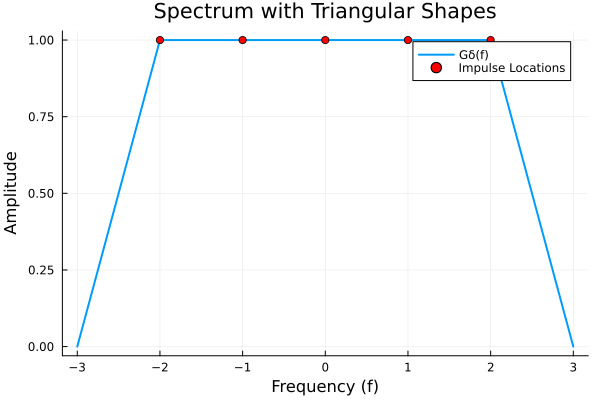

In [7]:
using Plots

# Define the parameters
fs = 1.0  # Sampling frequency
f = -3fs:0.01:3fs  # Frequency range

# Define the triangular function in frequency domain
function triangular(f, center, width)
    x = abs.(f .- center)  # Element-wise absolute difference
    return max.(0, 1 .- x ./ width)  # Element-wise triangular calculation
end

# Create the periodic spectrum with triangular shapes
Gf = triangular(f, 0, fs) .+ triangular(f, fs, fs) .+ triangular(f, -fs, fs) .+
     triangular(f, 2fs, fs) .+ triangular(f, -2fs, fs)

# Plot the spectrum
plot(f, Gf, lw=2, label="Gδ(f)", xlabel="Frequency (f)", ylabel="Amplitude",
     title="Spectrum with Triangular Shapes", legend=:topright, grid=true)

# Add markers for impulse locations
scatter!([0, fs, -fs, 2fs, -2fs], [1, 1, 1, 1, 1], color=:red, label="Impulse Locations")